## Titanic - Analysis by Adepoju Ibrahim

#### step 1: Load data on python

In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic.csv')

#### step 2: Print starting 10 rows and last 10 rows

In [3]:
# starting 10 rows

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# last 10 row

data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### step 3: Shape of the data

In [6]:
data.shape

(891, 12)

####  step 4: Print all columns name

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### step 5: Find the data type of all the columns

In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### step 6: Print information and summary

In [11]:
#information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# summary

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### step 7: Count Survived and show on pie chart

In [15]:
# checked the column survived

data['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [19]:
survived = data['Survived'].value_counts()

In [20]:
survived

0    549
1    342
Name: Survived, dtype: int64

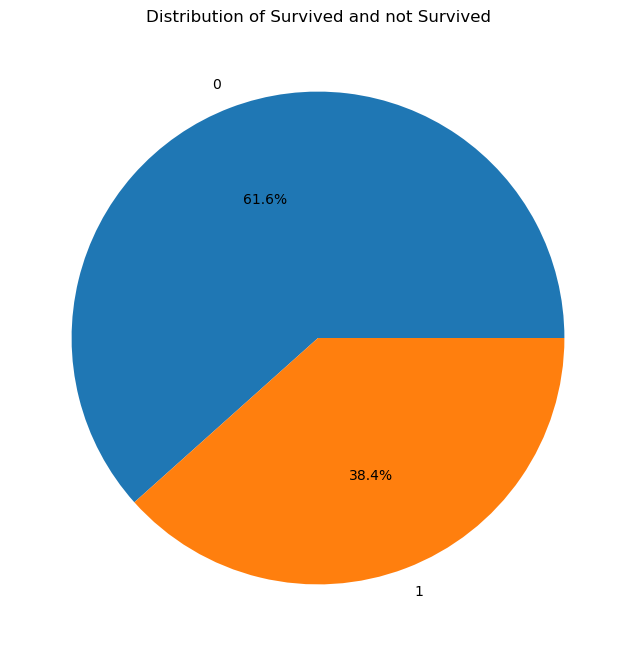

In [24]:
# pie chart

plt.figure(figsize = (10,8))
plt.pie(survived , labels = survived.index , autopct = '%1.1f%%')
plt.title('Distribution of Survived and not Survived')
plt.show()

#### step 8: Research questions 

Find out how many female passengers had travelled in first class and show on pie 
chart

In [26]:
female_first_class = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]

In [27]:
female_first_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [28]:
# count the number of female passenger who traveled in first class

female_count = len(female_first_class)

In [29]:
female_count

94

<function matplotlib.pyplot.show(close=None, block=None)>

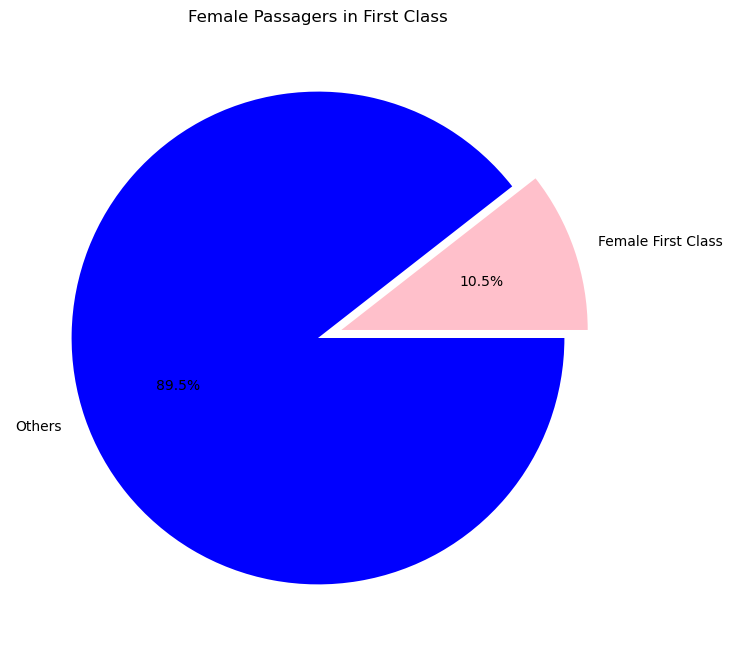

In [30]:
# create a pie chart

labels = ['Female First Class' , 'Others']
sizes = [female_count , len(data)-female_count]
colours = [ 'pink' , 'blue']
explode = [0.1 , 0]

plt.figure(figsize = (10,8))
plt.pie(sizes , labels = labels , colors = colours , explode = explode, autopct = '%1.1f%%')
plt.title('Female Passagers in First Class')
plt.show

#### question 2: Find out how many female passengers had Survived and her age <30, show on pie  chart and bar graph

In [47]:
#filter the data to get female passagers who survived and were under 30

female_survived_under30 = data[(data['Sex'] == 'female') & (data['Survived'] == 1) & (data['Age'] < 30 )]

In [48]:
female_survived_under30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [49]:
# count the number of female passengers who survived and were under 30

female_under_30 = len(female_survived_under30)

In [50]:
female_under_30

105

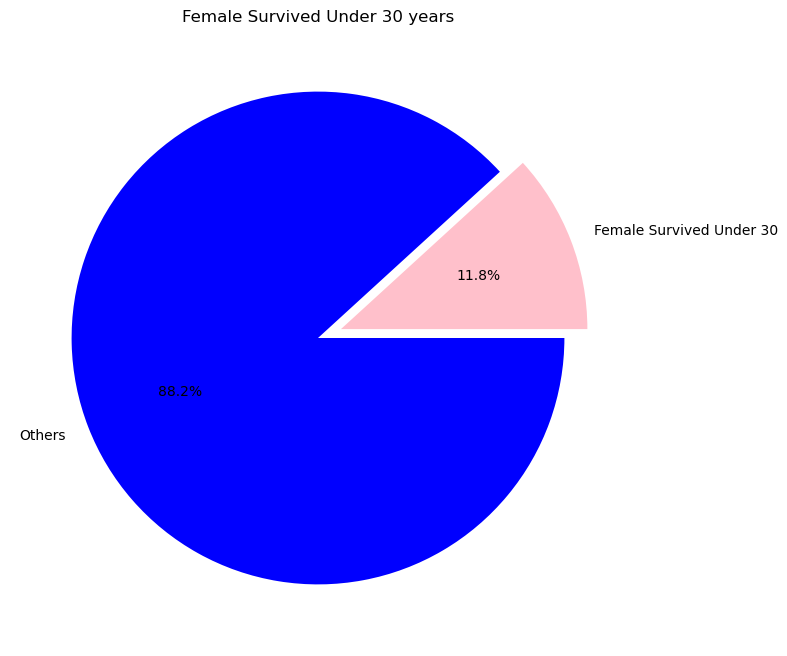

In [51]:
# create a pie chart

labels = ['Female Survived Under 30' , 'Others']
sizes = [female_under_30 , len(data) - female_under_30]
colors = ['pink' , 'blue']
explode = [0.1,0]

plt.figure(figsize=(10,8))
plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.title('Female Survived Under 30 years')
plt.show()

In [54]:
#count the number of female passengers who did not survive and were under 30

female_not_survive_under30 = data[(data['Sex'] == 'female') & (data['Survived'] == 0) & (data['Age'] < 30)]

In [55]:
female_not_survive_under30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [56]:
female_not_survived_count = len(female_not_survive_under30)

In [57]:
female_not_survived_count

42

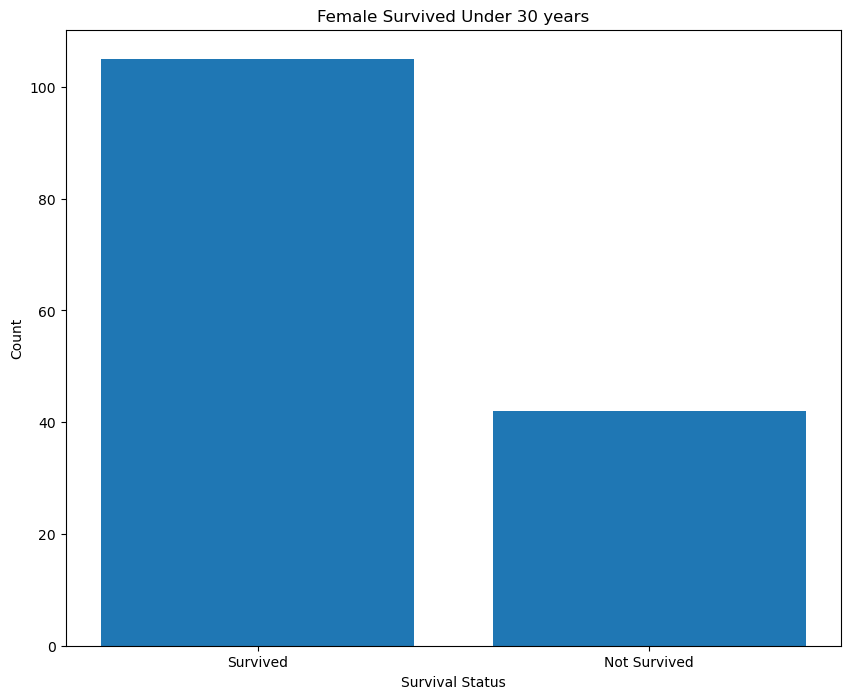

In [62]:
# create a bar chart


plt.figure(figsize=(10,8))
plt.bar(['Survived' , 'Not Survived'], [female_under_30 , female_not_survived_count])
plt.title('Female Survived Under 30 years')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

#### question 3: Find out how many male passengers had Survived and his age >40, show on pie chart

In [63]:
#filter the data to get male passager to get who survived and were over 40

male_survived_over40 = data[(data['Sex'] == 'male') & (data['Survived'] == 1) & (data['Age'] > 40)]

In [64]:
male_survived_over40

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


In [65]:
#count the survival male that above 40

count_survive = len(male_survived_over40)

In [66]:
count_survive

18

In [67]:
# count the total number of male passeger

male_count = len(data[data['Sex'] == 'male'])

In [68]:
male_count

577

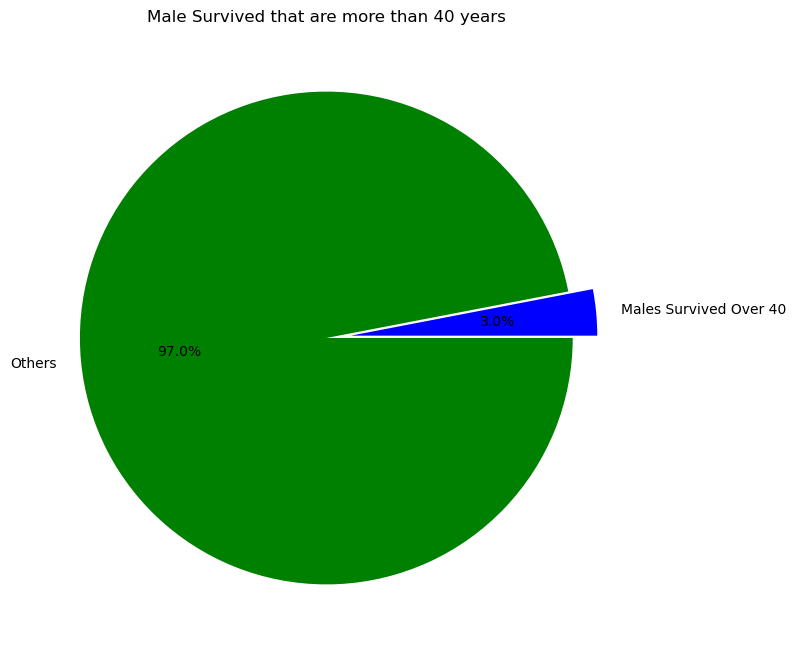

In [70]:
# create a pie chart represent

labels = ['Males Survived Over 40','Others']
sizes = [count_survive,male_count]
colors = ['blue','green']
explode = [0.1,0]

plt.figure(figsize=(10,8))
plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.title('Male Survived that are more than 40 years')
plt.show()

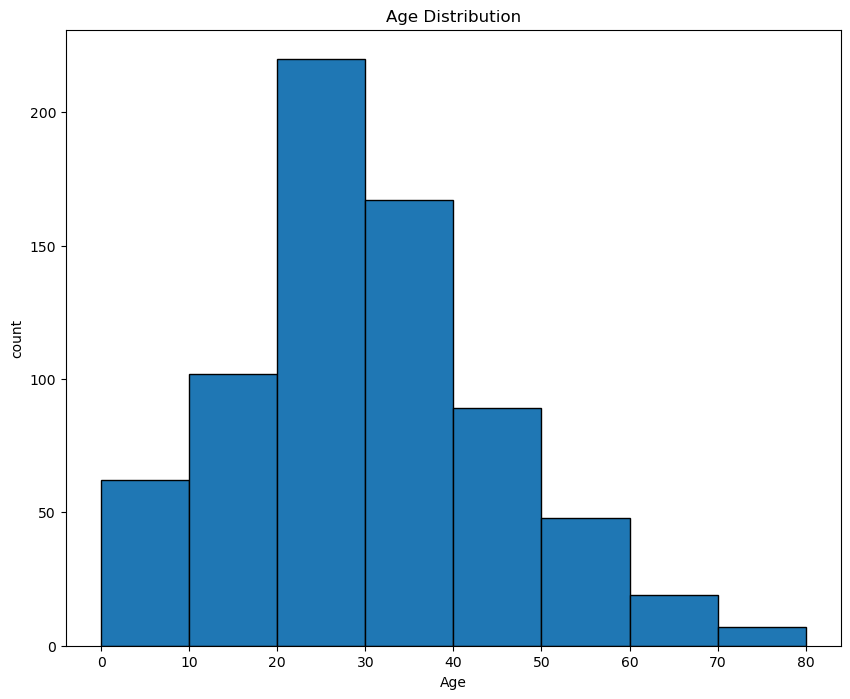

In [72]:
# Show age with 20 bins

# create bin for ages 

bins = [0,10,20,30,40,50,60,70,80]

# create a histohram with age bins

plt.figure(figsize = (10,8))
plt.hist(data['Age'].dropna(),bins = bins, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

### step 9: Show age frequency with survived and not survived (Histogram) 

<function matplotlib.pyplot.show(close=None, block=None)>

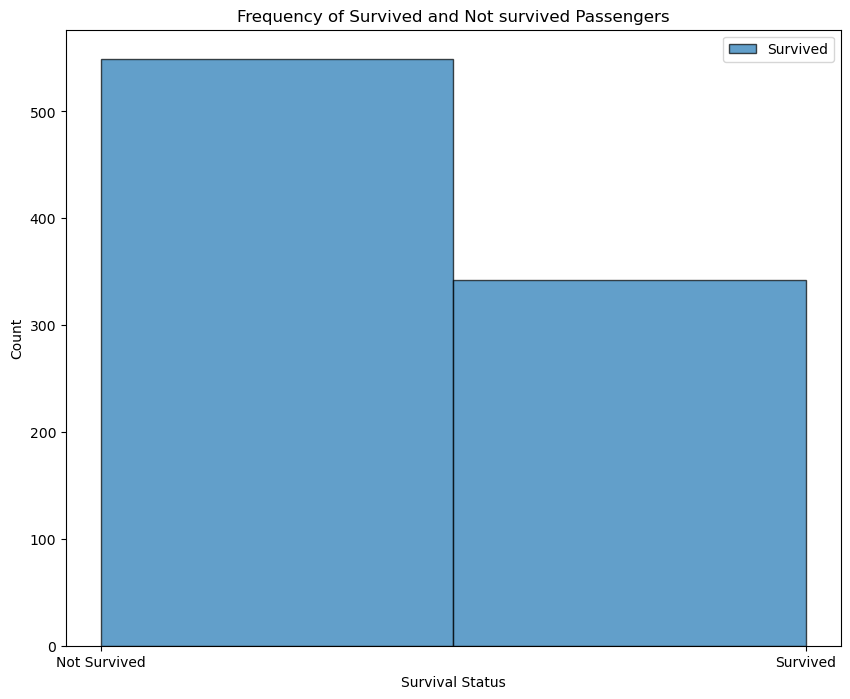

In [74]:
# create a histogram 

plt.figure(figsize = (10,8))
plt.hist(data['Survived'], bins = 2, edgecolor = 'black', alpha = 0.7, label = ['Survived' , 'Not Survived'])
plt.title('Frequency of Survived and Not survived Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0,1],['Not Survived' , 'Survived'])
plt.legend()
plt.show

#### step 10: Show Bar graph for Survived with male, female, class

In [75]:
# group the data by sex and pclass and calculate the survival rate

survival_rate = data.groupby(['Sex' , 'Pclass'])['Survived'].mean().reset_index()

In [76]:
survival_rate

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [77]:
# pivot the data to create bar chat
s_rate = survival_rate.pivot(index= 'Pclass', columns = 'Sex' , values = 'Survived')

In [78]:
s_rate

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


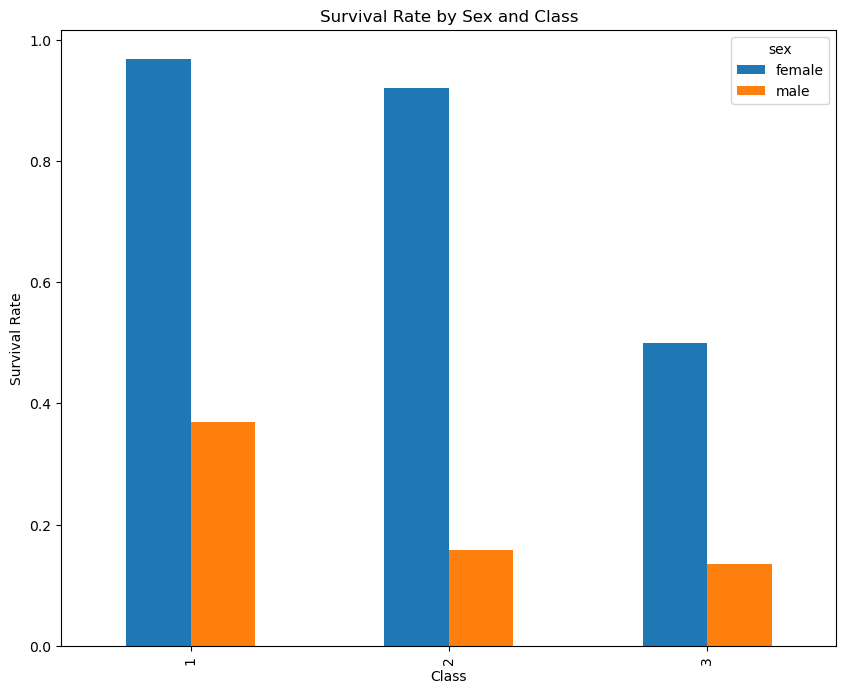

In [80]:
# create bar chart

s_rate.plot(kind = 'bar', figsize = (10,8))
plt.title('Survival Rate by Sex and Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.legend(title = 'sex')
plt.show()

In [81]:
# in subplot

# group the data by sex and pclass and calculate the survival rate of male and female

survival_rate_male = data[data['Sex'] == 'male'].groupby('Pclass')['Survived'].mean()

survival_rate_female = data[data['Sex'] == 'female'].groupby('Pclass')['Survived'].mean()

In [82]:
survival_rate_male

Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64

In [83]:
survival_rate_female

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival Rate')

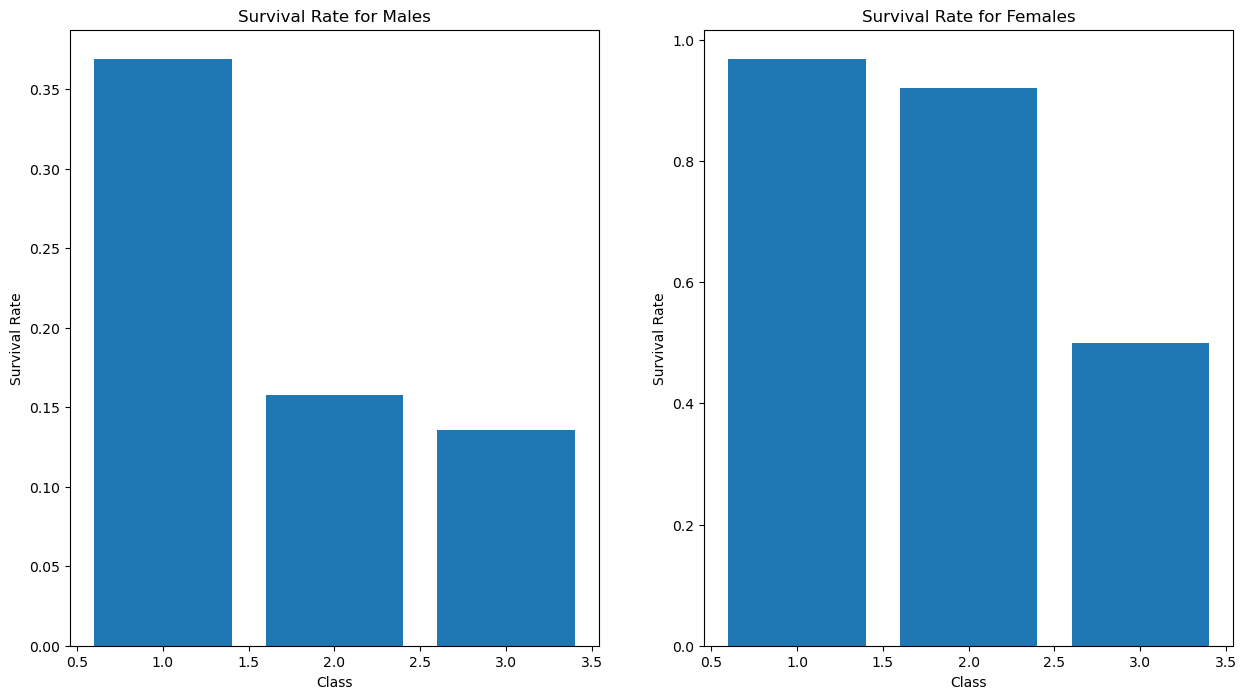

In [90]:
#plot the survival rate for males in the sublot
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].bar(survival_rate_male.index,survival_rate_male.values)
ax[0].set_title('Survival Rate for Males')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Survival Rate')
#plot the survival rate for females in the sublot
ax[1].bar(survival_rate_female.index,survival_rate_female.values)
ax[1].set_title('Survival Rate for Females')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Survival Rate')


### question 6: How many passengers are travelled in different classes show in Bar graph

In [91]:
# group the data by Pclass 

class_count = data['Pclass'].value_counts()

In [92]:
class_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

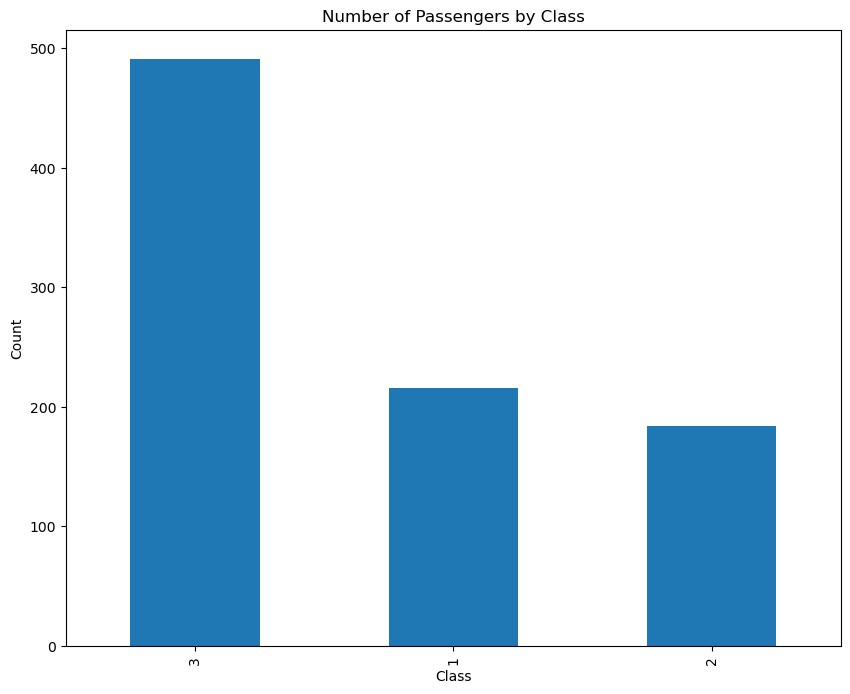

In [93]:
# plot bar chart to show the relationship

plt.figure(figsize=(10,8))
class_count.plot(kind= 'bar')
plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

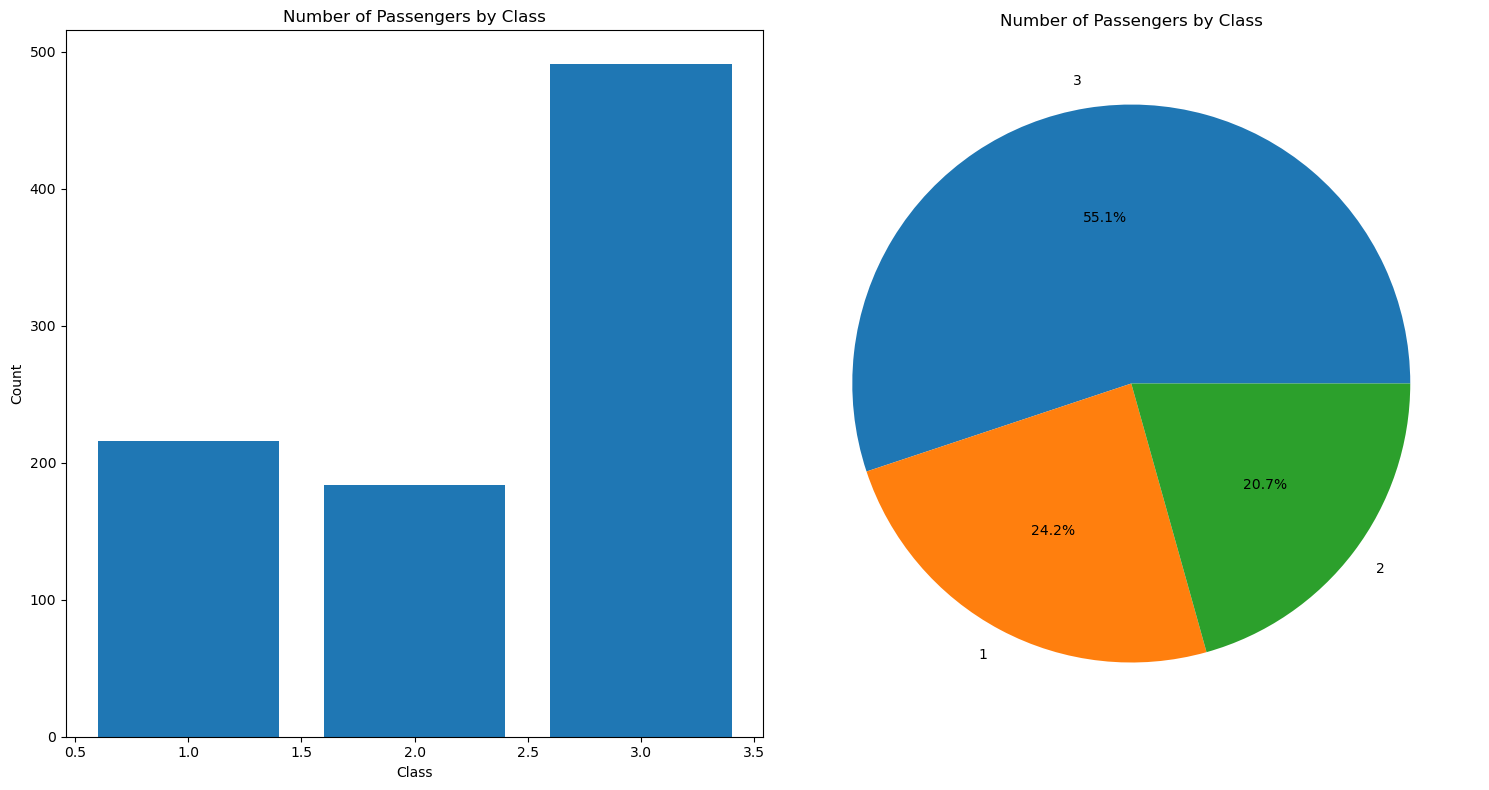

In [94]:
# in subplot

fig, ax = plt.subplots(1,2,figsize=(15,8))

#plot the first in the subplot

ax[0].bar(class_count.index,class_count.values)
ax[0].set_title('Number of Passengers by Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
#plot the 2nd in the sublot
ax[1].pie(class_count.values, labels = class_count.index, autopct = '%1.1f%%')
ax[1].set_title('Number of Passengers by Class')
ax[1].set_xlabel('')
# layout so plot dont over lap
fig.tight_layout()
plt.show()

#### Question 7: How many passengers are survived with class wise and show in Bar graph

In [95]:
# group the data by Pclass and survived and calculate the count

survived_count = data[data['Survived'] == 1].groupby('Pclass')['PassengerId'].count()

In [96]:
survived_count

Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64

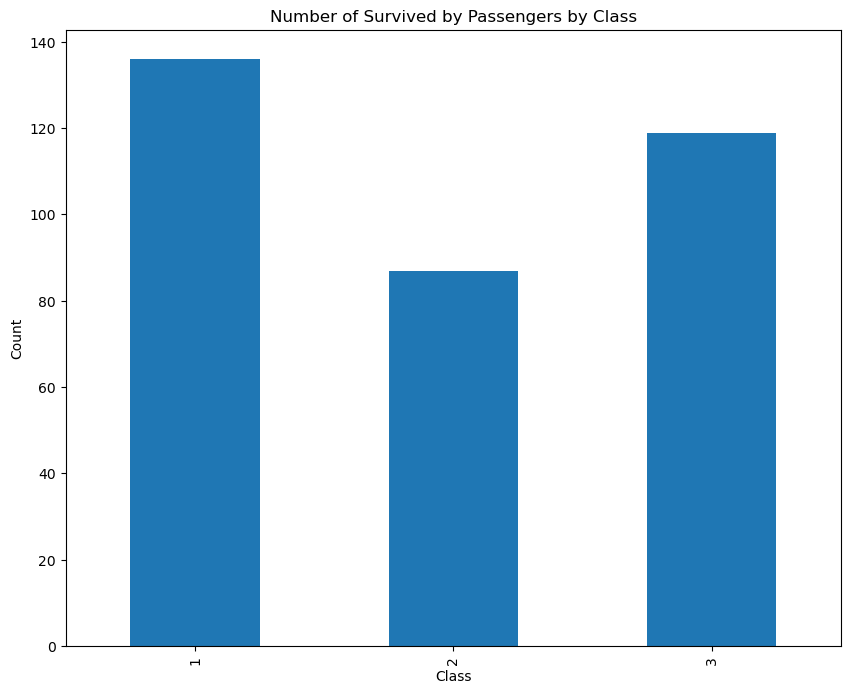

In [97]:
#bar chart

plt.figure(figsize=(10,8))
survived_count.plot(kind = 'bar')
plt.title('Number of Survived by Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### question 7: Show Bar graph for Survived with 3rd class male, 1st class female

In [100]:
# filter the data for 3rd class male and 1st class female

third_class_male = data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]
first_class_female = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]

In [102]:
#calculate the survival rate for each group

third_class_male_survived = third_class_male['Survived'].value_counts()[1]
third_class_male_not_survived = third_class_male['Survived'].value_counts()[0]
first_class_female_survived = first_class_female['Survived'].value_counts()[1]
first_class_female_not_survived = first_class_female['Survived'].value_counts()[0]

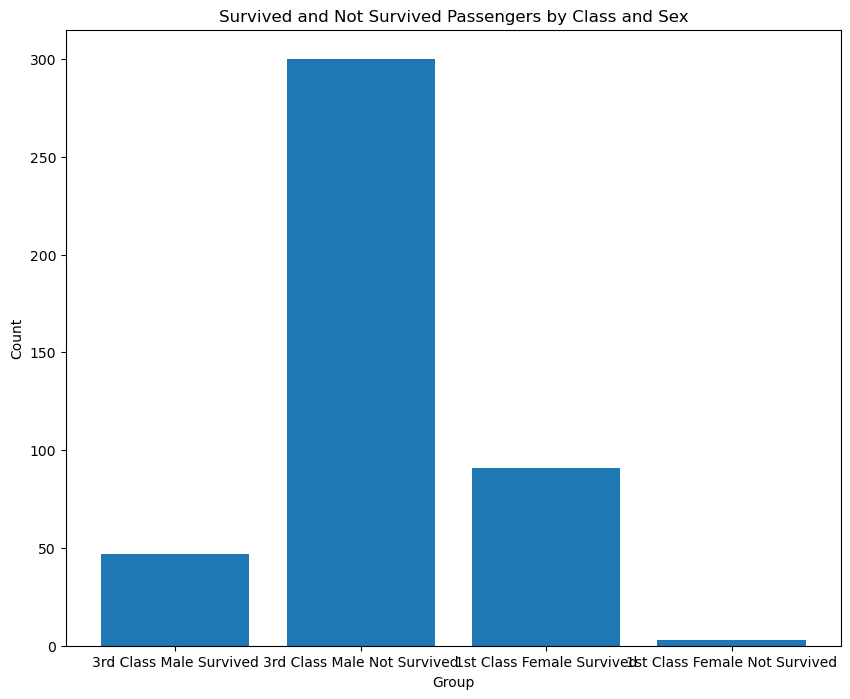

In [104]:
## Plot a bar graph
plt.figure(figsize=(10,8))
plt.bar(['3rd Class Male Survived', '3rd Class Male Not Survived', '1st Class Female Survived', '1st Class Female Not Survived'], 
         [third_class_male_survived, third_class_male_not_survived, first_class_female_survived, first_class_female_not_survived])
plt.title('Survived and Not Survived Passengers by Class and Sex')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()


### question 8 : How many passengers are survived / not survived and they are 1st class female

In [106]:
## Filter the data for 1st class female passengers
first_class_female = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]


In [108]:
##Calculate the survival rate for 1st class female passengers
survived = first_class_female[first_class_female['Survived'] == 1].shape[0]
not_survived = first_class_female[first_class_female['Survived'] == 0].shape[0]

In [112]:
##Print the results
print(f"Survived: {survived}")
print(f"Not Survived: {not_survived}")


Survived: 91
Not Survived: 3


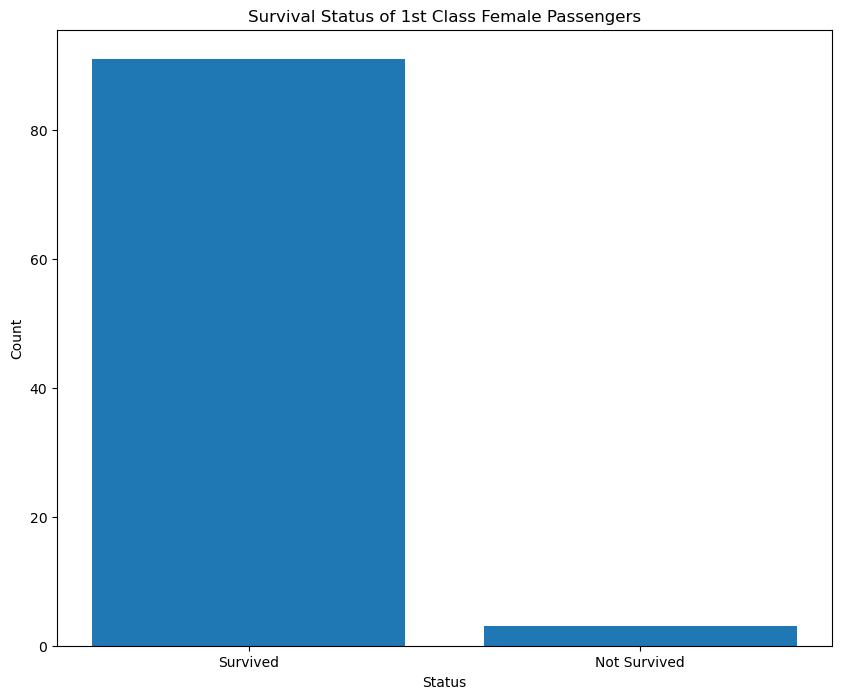

In [113]:
##Plot a bar graph

plt.figure(figsize=(10,8))
plt.bar(['Survived', 'Not Survived'], [survived, not_survived])
plt.title('Survival Status of 1st Class Female Passengers')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



#### - step 10: Map the Sex column male=1, female =0

In [114]:
# map the Sex column to numerical values

data['Sex'] = data['Sex'].map({'male' : 1, 'female' : 0})

In [117]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### - step 11: finding the null values


In [118]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### step 12: Replace Null value to Median value

In [120]:
##Find columns with null values
null_columns = data.columns[data.isnull().any()]

##Replace null values with median values
for column in null_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())



In [121]:
##Verify that null values have been replaced
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
